# Clasificación de Imagen con TensorFlow - Dataset MNIST

In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models

2024-03-11 17:31:00.967564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset

In [2]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/Users/anpinto/opt/anaconda3/envs/redes/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

### Carga y división del dataset MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Exploración del dataset

In [4]:
print(f'Tamaño del dataset de entrenamiento: \nImagenes: {X_train.shape}\nEtiquetas: {y_train.shape}')

Tamaño del dataset de entrenamiento: 
Imagenes: (60000, 28, 28)
Etiquetas: (60000,)


In [5]:
print(f'Tamaño del dataset de test: \nImagenes: {X_test.shape}\nEtiquetas: {y_test.shape}')

Tamaño del dataset de test: 
Imagenes: (10000, 28, 28)
Etiquetas: (10000,)


### Visualización de las imagenes

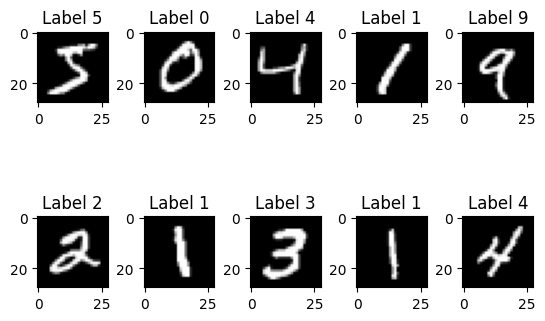

In [6]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.gca().set_title('Label ' + str(y_train[i]))

plt.subplots_adjust(hspace=0.0, wspace = 0.5)
plt.show()

### Normalización de los datos

In [7]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))
print('Imagenes de entrenamiento size {}, Size etiquetas: {}'.format(X_train.shape, y_train.shape))
print('Imagenes de prueba size {}, Size etiquetas: {}'.format(X_test.shape, y_test.shape))

Imagenes de entrenamiento size (60000, 28, 28, 1), Size etiquetas: (60000,)
Imagenes de prueba size (10000, 28, 28, 1), Size etiquetas: (10000,)


In [9]:
X_train = X_train.astype('float32')
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

In [9]:
X_test = X_test.astype('float32')
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

## Definición del Modelo

In [10]:
tf.keras.backend.clear_session

<function keras.src.backend.clear_session()>

![CNN](cnn.png)

In [11]:
inputs = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(6, (5, 5), padding='same', activation='relu')(inputs)
pool1 = layers.MaxPool2D((2, 2), (2, 2))(conv1)
conv2 = layers.Conv2D(16, (5, 5), padding='valid', activation='relu')(pool1)
pool2 = layers.MaxPool2D((2, 2), (2, 2))(conv2)
flat = layers.Flatten()(pool2)
FC1 = layers.Dense(120, activation='relu')(flat)
FC2 = layers.Dense(84, activation='relu')(FC1)
outputs = layers.Dense(10, activation='softmax')(FC2)

mnist_model = models.Model(inputs, outputs)
mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [12]:
mnist_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del Modelo

In [13]:
history = mnist_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)
loss, acc = mnist_model.evaluate(X_test, y_test, verbose = 1)
print(f'Loss: {loss} - Accuracy: {acc}')

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.3383 - accuracy: 0.8992 - val_loss: 0.0945 - val_accuracy: 0.9697
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0769 - accuracy: 0.9760 - val_loss: 0.0618 - val_accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0464 - val_accuracy: 0.9833
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0436 - val_accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0263 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0363 - val_accuracy:

## Evaluación del Modelo

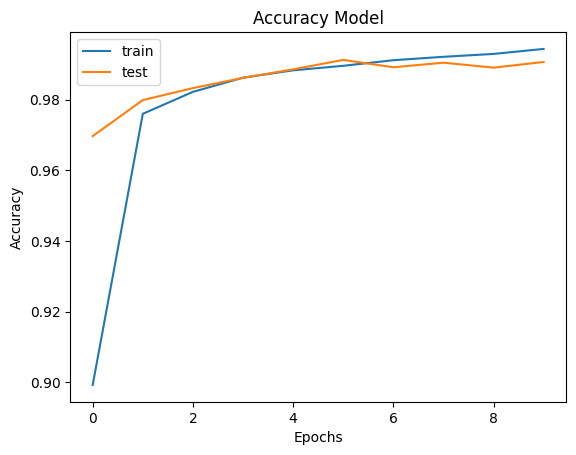

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

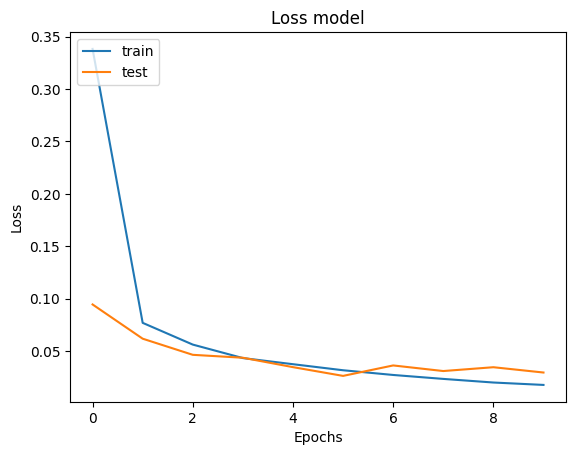

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

## Guardado del Modelo Entrenado

In [22]:
# mnist_model.save('mnistown.keras')

## Carga del Modelo Guardado

In [17]:
created_model = load_model('mnistown.keras')

## Prueba del Modelo con Imagen propia

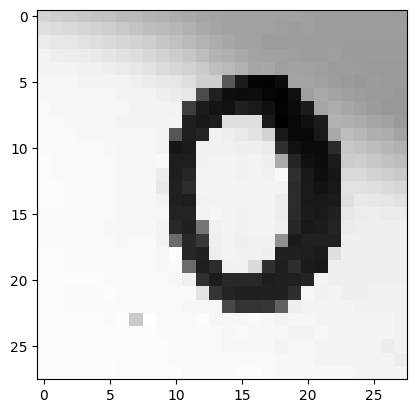

In [18]:
test_image = cv2.imread('test_images/digits_0.png', cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (28,28))
test_image = test_image.astype('float32')

resized = test_image.reshape(28, 28, 1)

1/1 [==============================] - 0s 114ms/step
0


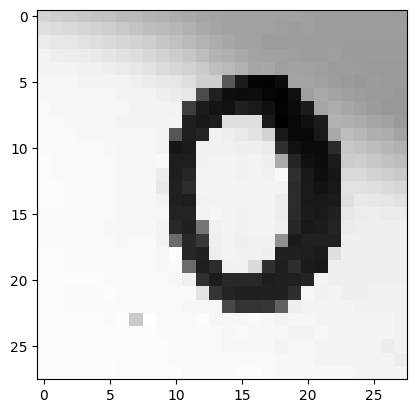

In [19]:
pred = mnist_model.predict(resized.reshape(1, 28, 28, 1))
print(pred.argmax())

plt.imshow(resized, cmap='gray')
plt.show()

1/1 [==============================] - 0s 16ms/step
0


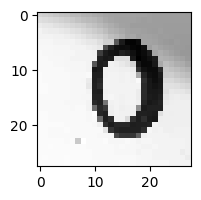

1/1 [==============================] - 0s 16ms/step
3


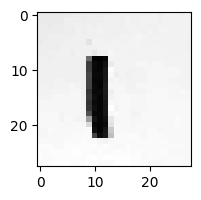

1/1 [==============================] - 0s 16ms/step
2


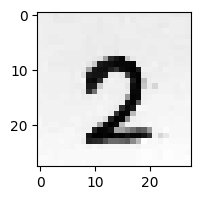

1/1 [==============================] - 0s 17ms/step
3


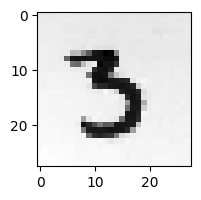

1/1 [==============================] - 0s 17ms/step
2


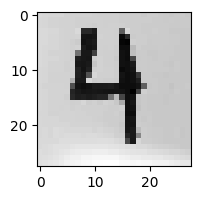

1/1 [==============================] - 0s 16ms/step
8


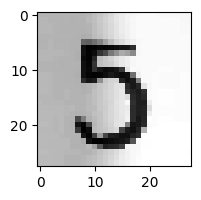

1/1 [==============================] - 0s 16ms/step
0


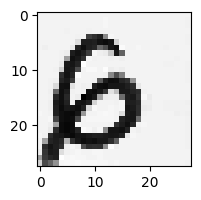

1/1 [==============================] - 0s 16ms/step
2


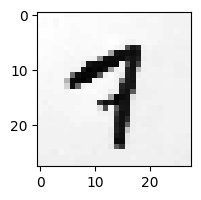

1/1 [==============================] - 0s 17ms/step
8


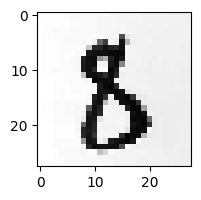

1/1 [==============================] - 0s 16ms/step
2


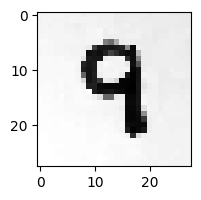

In [21]:
for number in range(0, 10):
    test_image = cv2.imread(f'test_images/digits_{number}.png', cv2.IMREAD_GRAYSCALE)
    test_image = cv2.resize(test_image, (28,28))
    test_image = test_image.astype('float32')

    resized = test_image.reshape(28, 28, 1)
    
    pred = mnist_model.predict(resized.reshape(1, 28, 28, 1))
    print(np.argmax(pred))

    plt.figure(figsize=(2, 2))
    plt.imshow(resized, cmap='gray')
    plt.show()